In [285]:
import pandas_datareader as pdr

In [387]:
df = pdr.DataReader('AAPL','yahoo','2014-01-01','2020-01-01')  #AAPL refer to apple

In [388]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,20.045713,19.785713,19.791786,20.036428,223084400.0,17.766464
2014-01-02,19.893929,19.715000,19.845715,19.754642,234684800.0,17.516611
2014-01-03,19.775000,19.301071,19.745001,19.320715,392467600.0,17.131840
2014-01-06,19.528570,19.057142,19.194643,19.426071,412610800.0,17.225256
2014-01-07,19.498571,19.211430,19.440001,19.287144,317209200.0,17.102068
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027306
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416664
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389580


In [389]:
df1=df.reset_index() # reset the index to integers

In [390]:
df1 = df1.Close

In [391]:
df1

0       20.036428
1       19.754642
2       19.320715
3       19.426071
4       19.287144
          ...    
1506    71.067497
1507    72.477501
1508    72.449997
1509    72.879997
1510    73.412498
Name: Close, Length: 1511, dtype: float64

In [392]:
df1=df.reset_index() # reset the index to integers

In [393]:
df1 = df1.Close

In [394]:
df1

0       20.036428
1       19.754642
2       19.320715
3       19.426071
4       19.287144
          ...    
1506    71.067497
1507    72.477501
1508    72.449997
1509    72.879997
1510    73.412498
Name: Close, Length: 1511, dtype: float64

(1511,)


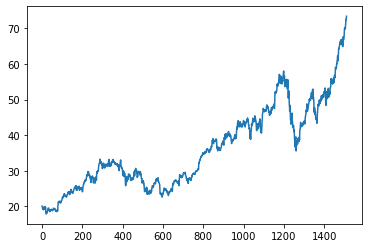

In [395]:
import matplotlib.pyplot as plt
plt.plot(df1)
print(df1.shape)

In [396]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))  # bring value is in range 0 to 1
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) 

In [397]:
df1.shape

(1511, 1)

In [398]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [399]:
training_size,test_size

(982, 529)

In [400]:
train_data

array([[0.03936315],
       [0.03429171],
       [0.02648209],
       [0.02837824],
       [0.02587789],
       [0.02807615],
       [0.02361532],
       [0.02131421],
       [0.02310755],
       [0.02995947],
       [0.03701062],
       [0.03501162],
       [0.02628282],
       [0.03168209],
       [0.03325045],
       [0.03625215],
       [0.02975378],
       [0.03260121],
       [0.00431943],
       [0.00062349],
       [0.        ],
       [0.00052707],
       [0.00112484],
       [0.00579133],
       [0.00823387],
       [0.00818245],
       [0.01279109],
       [0.01877528],
       [0.0232554 ],
       [0.02322965],
       [0.02869965],
       [0.02841679],
       [0.02970235],
       [0.02416168],
       [0.02016366],
       [0.01637132],
       [0.01784967],
       [0.0143209 ],
       [0.01129345],
       [0.01792684],
       [0.01700768],
       [0.01798468],
       [0.0202215 ],
       [0.02094142],
       [0.01990654],
       [0.01970731],
       [0.02001584],
       [0.023

In [401]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 || train_data[0:99,0] and 0 after (,) is axis i.e add all the data(array value from 0 to 59 will be merege in single array) in single array  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [402]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [403]:
print(X_train.shape), print(y_train.shape)

(881, 100)
(881,)


(None, None)

In [404]:
print(X_test.shape), print(ytest.shape)

(428, 100)
(428,)


(None, None)

In [405]:
X_train

array([[0.03936315, 0.03429171, 0.02648209, ..., 0.06847415, 0.06909118,
        0.07350059],
       [0.03429171, 0.02648209, 0.02837824, ..., 0.06909118, 0.07350059,
        0.08089244],
       [0.02648209, 0.02837824, 0.02587789, ..., 0.07350059, 0.08089244,
        0.07985115],
       ...,
       [0.32545299, 0.33490171, 0.32522801, ..., 0.46151426, 0.44968087,
        0.43951229],
       [0.33490171, 0.32522801, 0.32675785, ..., 0.44968087, 0.43951229,
        0.44860106],
       [0.32522801, 0.32675785, 0.32441815, ..., 0.43951229, 0.44860106,
        0.44432659]])

In [406]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)  # (1045 rows,100 columns and 1 feature i.e closing price)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [407]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [408]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # Input_shape is last 60 days closing(1) value 
#to know about how to calculate param follow below link
#https://towardsdatascience.com/counting-no-of-parameters-in-deep-learning-models-by-hand-8f1716241889
#DEFAULT ACTIVATION FUNCTION OF LSTM IS tanh(-1,1)
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [409]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_43 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_44 (LSTM)              (None, 50)                20200     
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [410]:
#model compiling with optimizer as adam and loss as mean squared
model.compile(loss='mean_squared_error',optimizer='adam')
from keras.callbacks import EarlyStopping
#earlyStop=EarlyStopping(monitor="val_loss",mode="min",restore_best_weights = True, min_delta = .01)  # https://keras.io/api/callbacks/early_stopping/ 

In [411]:
#history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks = [earlyStop])
history = model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 20s 885ms/step - loss: 0.0152 - val_loss: 0.0774
Epoch 2/100
14/14 [==============================] - 4s 319ms/step - loss: 0.0028 - val_loss: 0.0217
Epoch 3/100
14/14 [==============================] - 5s 335ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 4/100
14/14 [==============================] - 4s 289ms/step - loss: 5.3751e-04 - val_loss: 0.0036
Epoch 5/100
14/14 [==============================] - 4s 321ms/step - loss: 5.2052e-04 - val_loss: 0.0024
Epoch 6/100
14/14 [==============================] - 4s 296ms/step - loss: 5.0656e-04 - val_loss: 0.0023
Epoch 7/100
14/14 [==============================] - 4s 302ms/step - loss: 5.1539e-04 - val_loss: 0.0024
Epoch 8/100
14/14 [==============================] - 4s 298ms/step - loss: 4.7441e-04 - val_loss: 0.0020
Epoch 9/100
14/14 [==============================] - 4s 296ms/step - loss: 4.3667e-04 - val_loss: 0.0019
Epoch 10/100
14/14 [==============================] - 4s 292ms/ste

14/14 [==============================] - 5s 352ms/step - loss: 1.4028e-04 - val_loss: 4.8897e-04
Epoch 78/100
14/14 [==============================] - 5s 340ms/step - loss: 1.4755e-04 - val_loss: 5.0495e-04
Epoch 79/100
14/14 [==============================] - 5s 332ms/step - loss: 1.4266e-04 - val_loss: 6.4172e-04
Epoch 80/100
14/14 [==============================] - 5s 328ms/step - loss: 1.3769e-04 - val_loss: 5.9276e-04
Epoch 81/100
14/14 [==============================] - 5s 340ms/step - loss: 1.3877e-04 - val_loss: 4.6585e-04
Epoch 82/100
14/14 [==============================] - 5s 341ms/step - loss: 1.2892e-04 - val_loss: 5.4775e-04
Epoch 83/100
14/14 [==============================] - 5s 334ms/step - loss: 1.2957e-04 - val_loss: 5.8194e-04
Epoch 84/100
14/14 [==============================] - 5s 335ms/step - loss: 1.3420e-04 - val_loss: 5.6318e-04
Epoch 85/100
14/14 [==============================] - 5s 340ms/step - loss: 1.2691e-04 - val_loss: 4.7154e-04
Epoch 86/100
14/14 [===

In [412]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [413]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [414]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

30.135534841041963

In [415]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

51.11808300049229

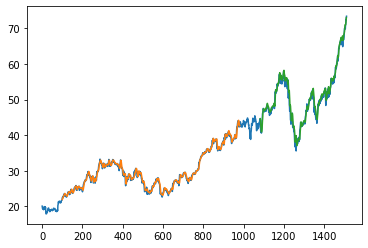

In [416]:
### Plotting 
# shift train predictions for plotting
import numpy
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [417]:
len(test_data)

529

In [418]:
x_input=test_data[429:].reshape(1,-1)
x_input.shape

(1, 100)

In [419]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [420]:
len(temp_input)

100

In [421]:
n = 30 # demonstrate prediction for next n days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<n):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[1.0098322629928589], [1.0185177326202393], [1.0273468494415283], [1.036157488822937], [1.0449391603469849], [1.053714394569397], [1.0625077486038208], [1.0713403224945068], [1.0802290439605713], [1.0891857147216797], [1.0982180833816528], [1.1073286533355713], [1.1165157556533813], [1.125775933265686], [1.1351031064987183], [1.144491195678711], [1.1539338827133179], [1.1634256839752197], [1.1729624271392822], [1.1825411319732666], [1.1921594142913818], [1.201816201210022], [1.211511492729187], [1.2212457656860352], [1.231019139289856], [1.2408323287963867], [1.2506853342056274], [1.2605785131454468], [1.2705104351043701], [1.2804807424545288]]


In [422]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [423]:
import matplotlib.pyplot as plt

In [424]:
len(df1)

1511

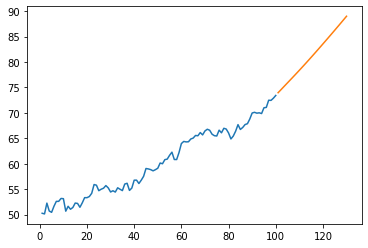

In [426]:
plt.plot(day_new,scaler.inverse_transform(df1[1411:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

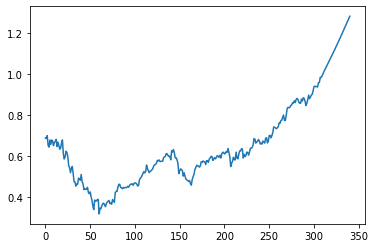

In [428]:
df3=df1.tolist()
df3.extend(lst_output)
#len(df3)
plt.plot(df3[1200:])

In [429]:
df3=scaler.inverse_transform(df3).tolist()

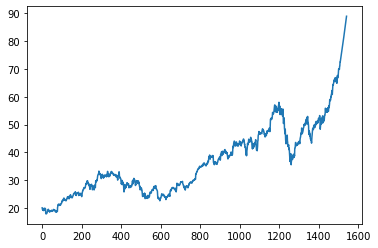

In [430]:
plt.plot(df3)